In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Aukshani Londhe/Desktop/Aukshani_Creations/Projects/retail-analysis-project/Sample_ Superstore.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False)

In [7]:
df = df.drop_duplicates()

C:\Users\Aukshani Londhe\AppData\Local\Temp\ipykernel_31124\3710370579.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Category', y = 'Sales', data = df, estimator = sum, ci = None)


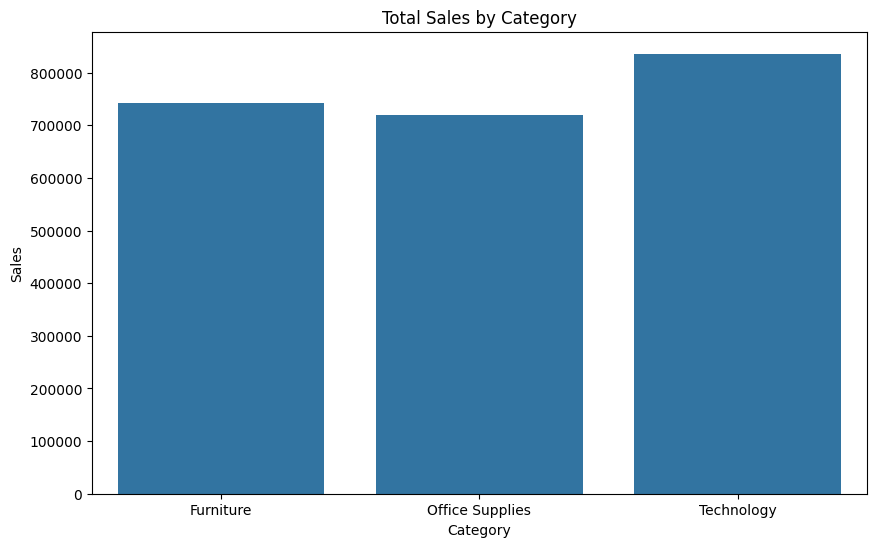

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Category', y = 'Sales', data = df, estimator = sum, ci = None)
plt.title("Total Sales by Category")
plt.show()

In [9]:
import datetime as dt
latest_date = df['Order Date'].max() + dt.timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,   # Recency
    'Order ID': 'count',                                    # Frequency 
    'Sales': 'sum'                                          # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


In [10]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Group'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Group
Customer ID,,,,,,,
AA-10315,185,11,5563.560,2,3,5,235
AA-10375,20,15,1056.390,5,4,2,542
AA-10480,260,12,1790.512,1,3,3,133
AA-10645,56,18,5086.935,3,4,5,345
AB-10015,416,6,886.156,1,1,1,111


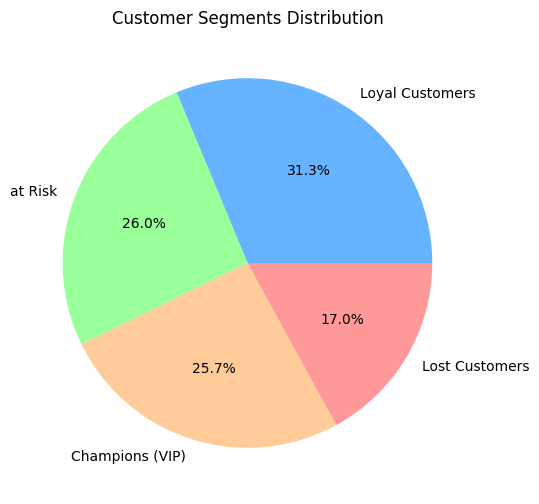

In [12]:
def segment_customer(df):
    score = int(df['R_Score']) + int(df['F_Score']) + int(df['M_Score'])
    if score >= 12:
        return 'Champions (VIP)'
    elif score >=9:
        return 'Loyal Customers'
    elif score >=6:
        return 'at Risk'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

plt.figure(figsize=(10, 6))
rfm['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Customer Segments Distribution")
plt.ylabel('')
plt.show()